## Dataset Details

- **Name**: 30000 Spotify Songs
- **Source**: Kaggle, JOAKIM ARVIDSSON
- **URL**: [Kaggle Dataset]https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data
- **License**: Its license type is Database: Open Database, Contents: Database Contents, the Licensor grants to us a worldwide, royalty-free, non-exclusive, perpetual, irrevocable copyright license to do any act that is restricted by copyright over anything within the Contents, whether in the original medium or any other. We can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. https://opendatacommons.org/licenses/dbcl/1-0/
- **Size**: The dataset spotify_songs.csv has a size of approximately 27.98 MB and contains 32,833 items (rows).

# Count of Spotify Tracks by Sub-Genre and Genre

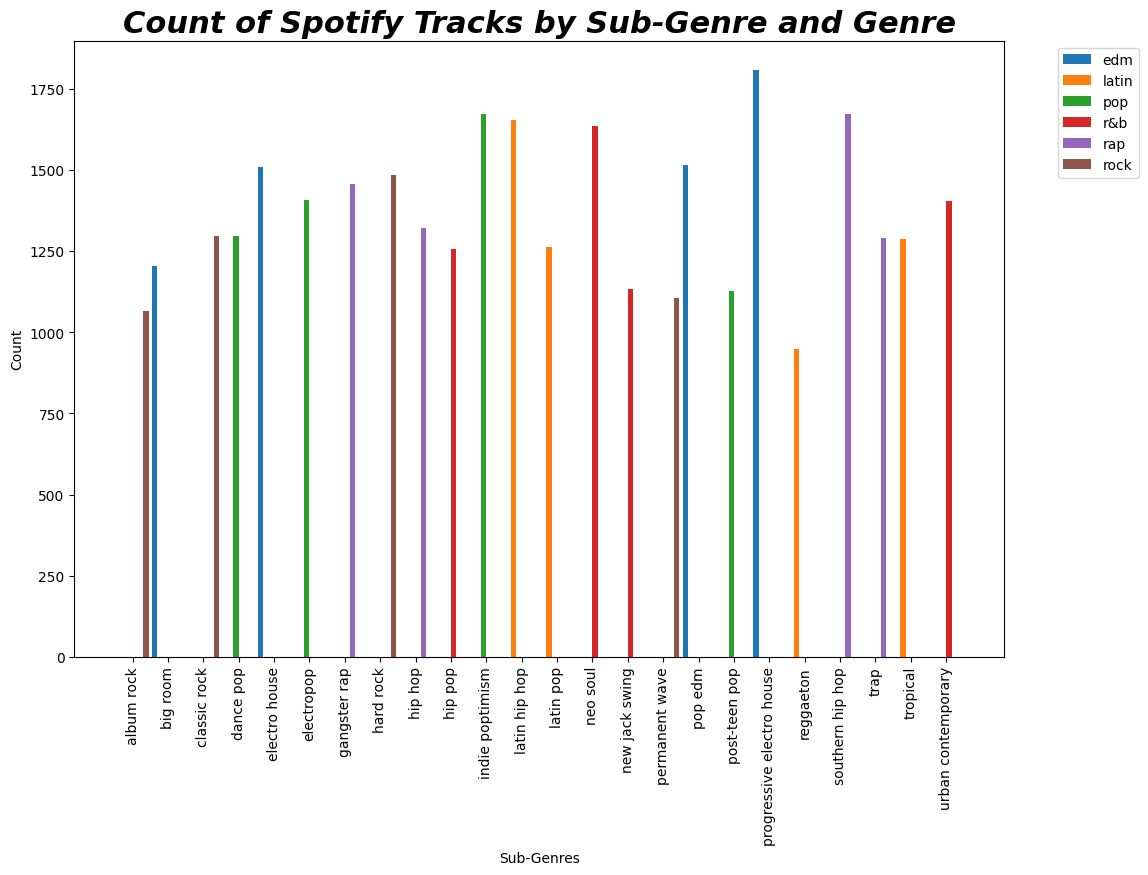

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r'spotify_songs.csv'
df = pd.read_csv(file_path)

genre_counts = df.groupby(['playlist_genre', 'playlist_subgenre']).size().reset_index(name='count')
pivot_data = genre_counts.pivot(index='playlist_subgenre', columns='playlist_genre', values='count').fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))

genres = pivot_data.columns.tolist()
sub_genres = pivot_data.index.tolist()
group_pos = np.arange(len(sub_genres))
bar_width = 0.15


for idx, category in enumerate(genres):
    offsets = group_pos - (bar_width * len(genres)) / 2 + (idx * bar_width) + bar_width / 2
    ax.bar(offsets, pivot_data[category], bar_width, label=category)

ax.set_xticks(group_pos)
ax.set_xticklabels(sub_genres, rotation=90)

ax.set_ylabel('Count')
ax.set_xlabel('Sub-Genres')
ax.set_title('Count of Spotify Tracks by Sub-Genre and Genre', fontsize=22, weight='bold', style='italic')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Top 10 Most Popular Track Artists

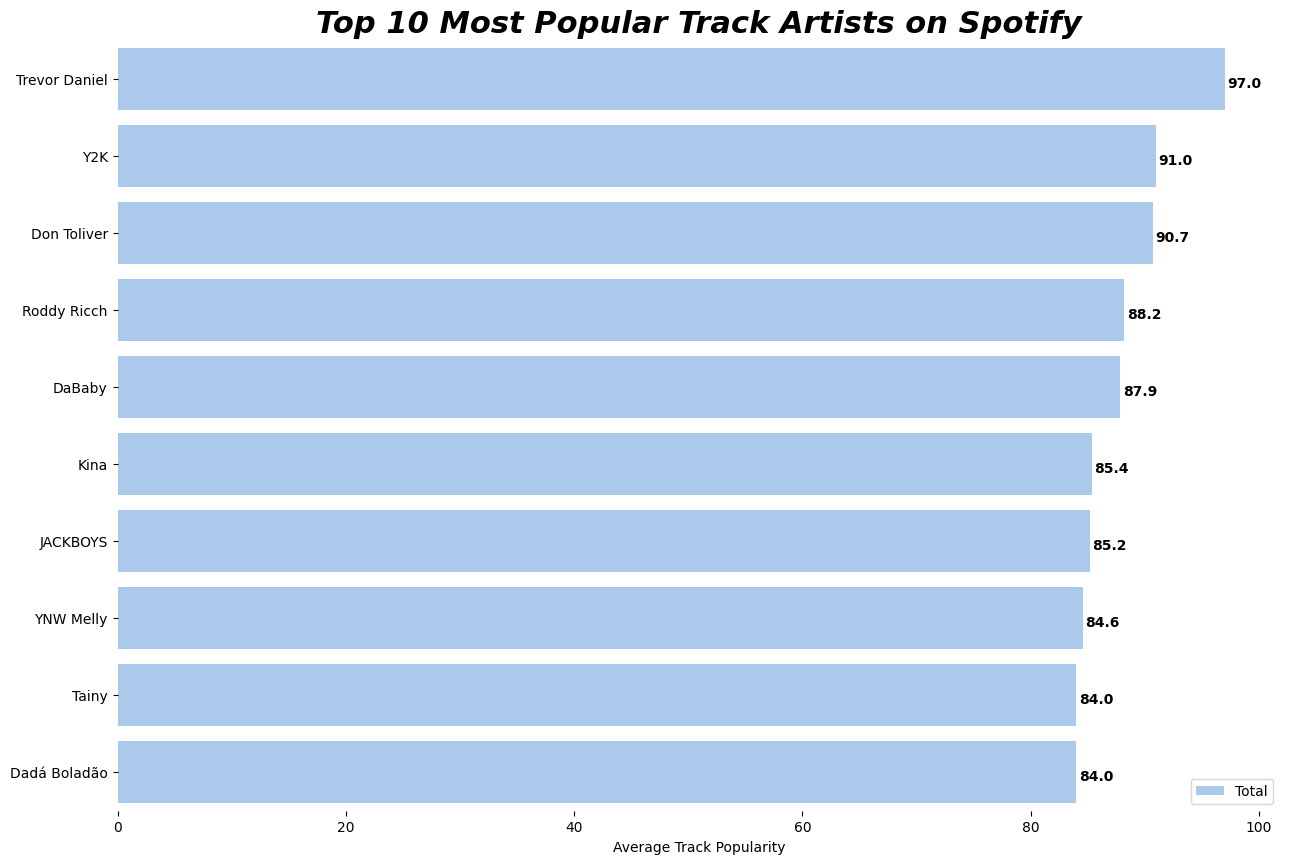

In [ ]:
import seaborn as sns

file_path = r'spotify_songs.csv'
df = pd.read_csv(file_path)

top_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)
f, ax = plt.subplots(figsize=(15, 10))

sns.set_color_codes("pastel")
sns.barplot(x=top_artists.values, y=top_artists.index,
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Average Track Popularity")
sns.despine(left=True, bottom=True)

for i, v in enumerate(top_artists.values):
    ax.text(v + 0.2, i + 0.1, str(round(v, 1)), color='black', fontweight='bold')

ax.set_title('Top 10 Most Popular Track Artists on Spotify', fontsize=22, weight='bold', style='italic')

plt.show()

# Percentage of Tracks in Minor vs Major for Each Sub-Genre

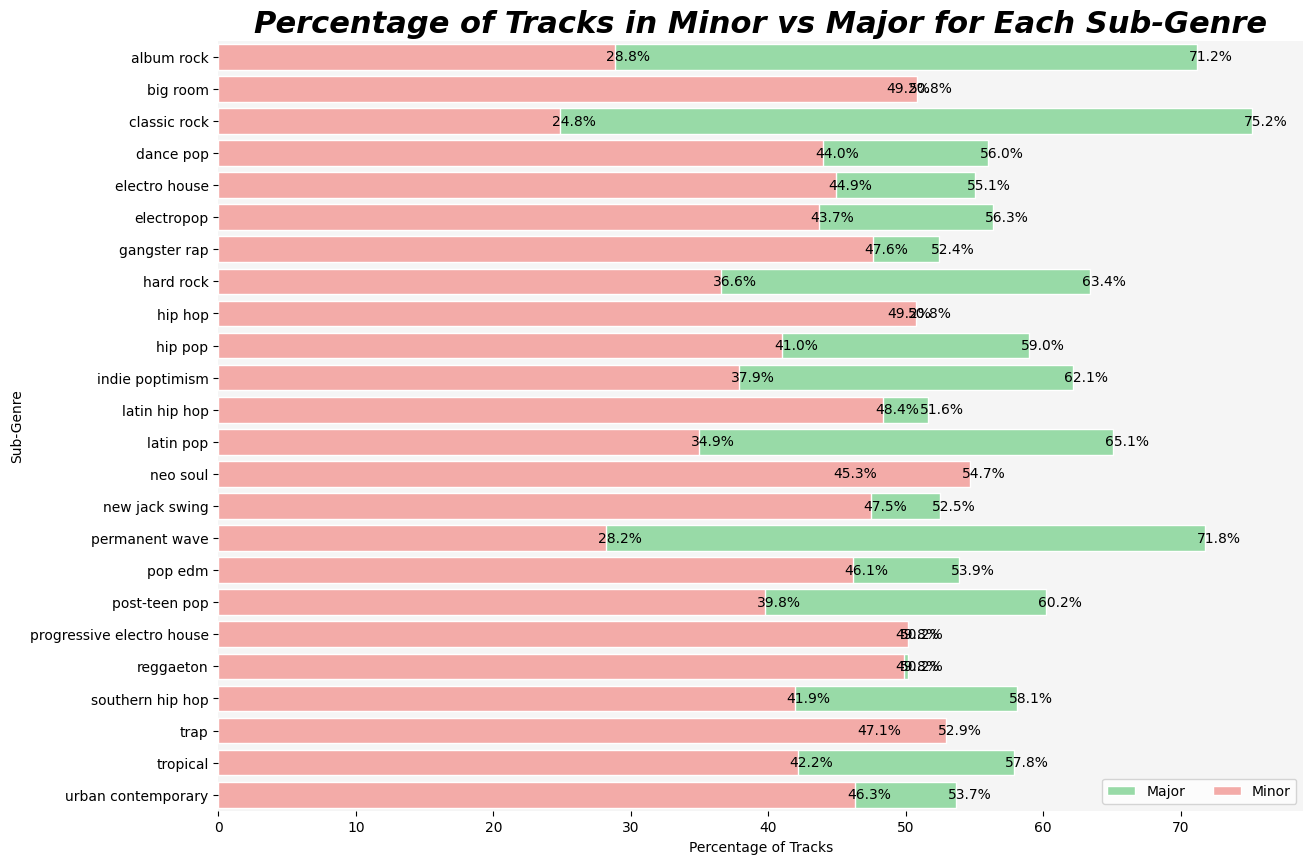

In [ ]:
sub_genre_mode_counts = df.groupby(['playlist_subgenre', 'mode']).size().unstack().fillna(0)
sub_genre_mode_percents = sub_genre_mode_counts.divide(sub_genre_mode_counts.sum(axis=1), axis=0) * 100
sub_genre_mode_percents.rename(columns={0: 'Minor', 1: 'Major'}, inplace=True)

sub_genre_mode_percents.reset_index(inplace=True)

f, ax = plt.subplots(figsize=(14, 10))

bar_major = sns.barplot(x='Major', y='playlist_subgenre', data=sub_genre_mode_percents,
                        label="Major", color="g", edgecolor='w')
bar_minor = sns.barplot(x='Minor', y='playlist_subgenre', data=sub_genre_mode_percents,
                        label="Minor", color="r", edgecolor='w')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Sub-Genre", xlabel="Percentage of Tracks")
sns.despine(left=True, bottom=True)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(bar.get_x() + width + 1,
            bar.get_y() + bar.get_height()/2.,
            '{0:.1f}%'.format(width),
            ha="center", va="center")

ax.set_facecolor('#f5f5f5')
ax.set_title('Percentage of Tracks in Minor vs Major for Each Sub-Genre',fontsize=22, weight='bold', style='italic')
plt.show()